## **Import Libraries**

In [ ]:
 import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Laod File

In [ ]:
df=pd.read_csv("/content/Prostate_Cancer Data- CSV.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
df.shape

(100, 10)

In [ ]:
df.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [ ]:
df.isna().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [ ]:
df['diagnosis_result'].value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

In [ ]:
100*df['diagnosis_result'].value_counts()/len(df['diagnosis_result'])

M    62.0
B    38.0
Name: diagnosis_result, dtype: float64

In [ ]:
df['diagnosis_result'] = df['diagnosis_result'].replace(['B'],'0')
df['diagnosis_result'] = df['diagnosis_result'].replace(['M'],'1')

In [ ]:
df[['diagnosis_result']] = df[['diagnosis_result']].apply(pd.to_numeric, errors ='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    int64  
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 7.9 KB


In [ ]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
df.drop('id',axis='columns', inplace=True)

## **Data Visulization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


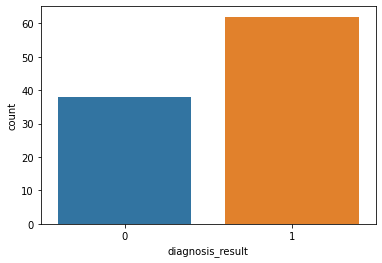

In [ ]:
sns.countplot(df['diagnosis_result'],label="Count")

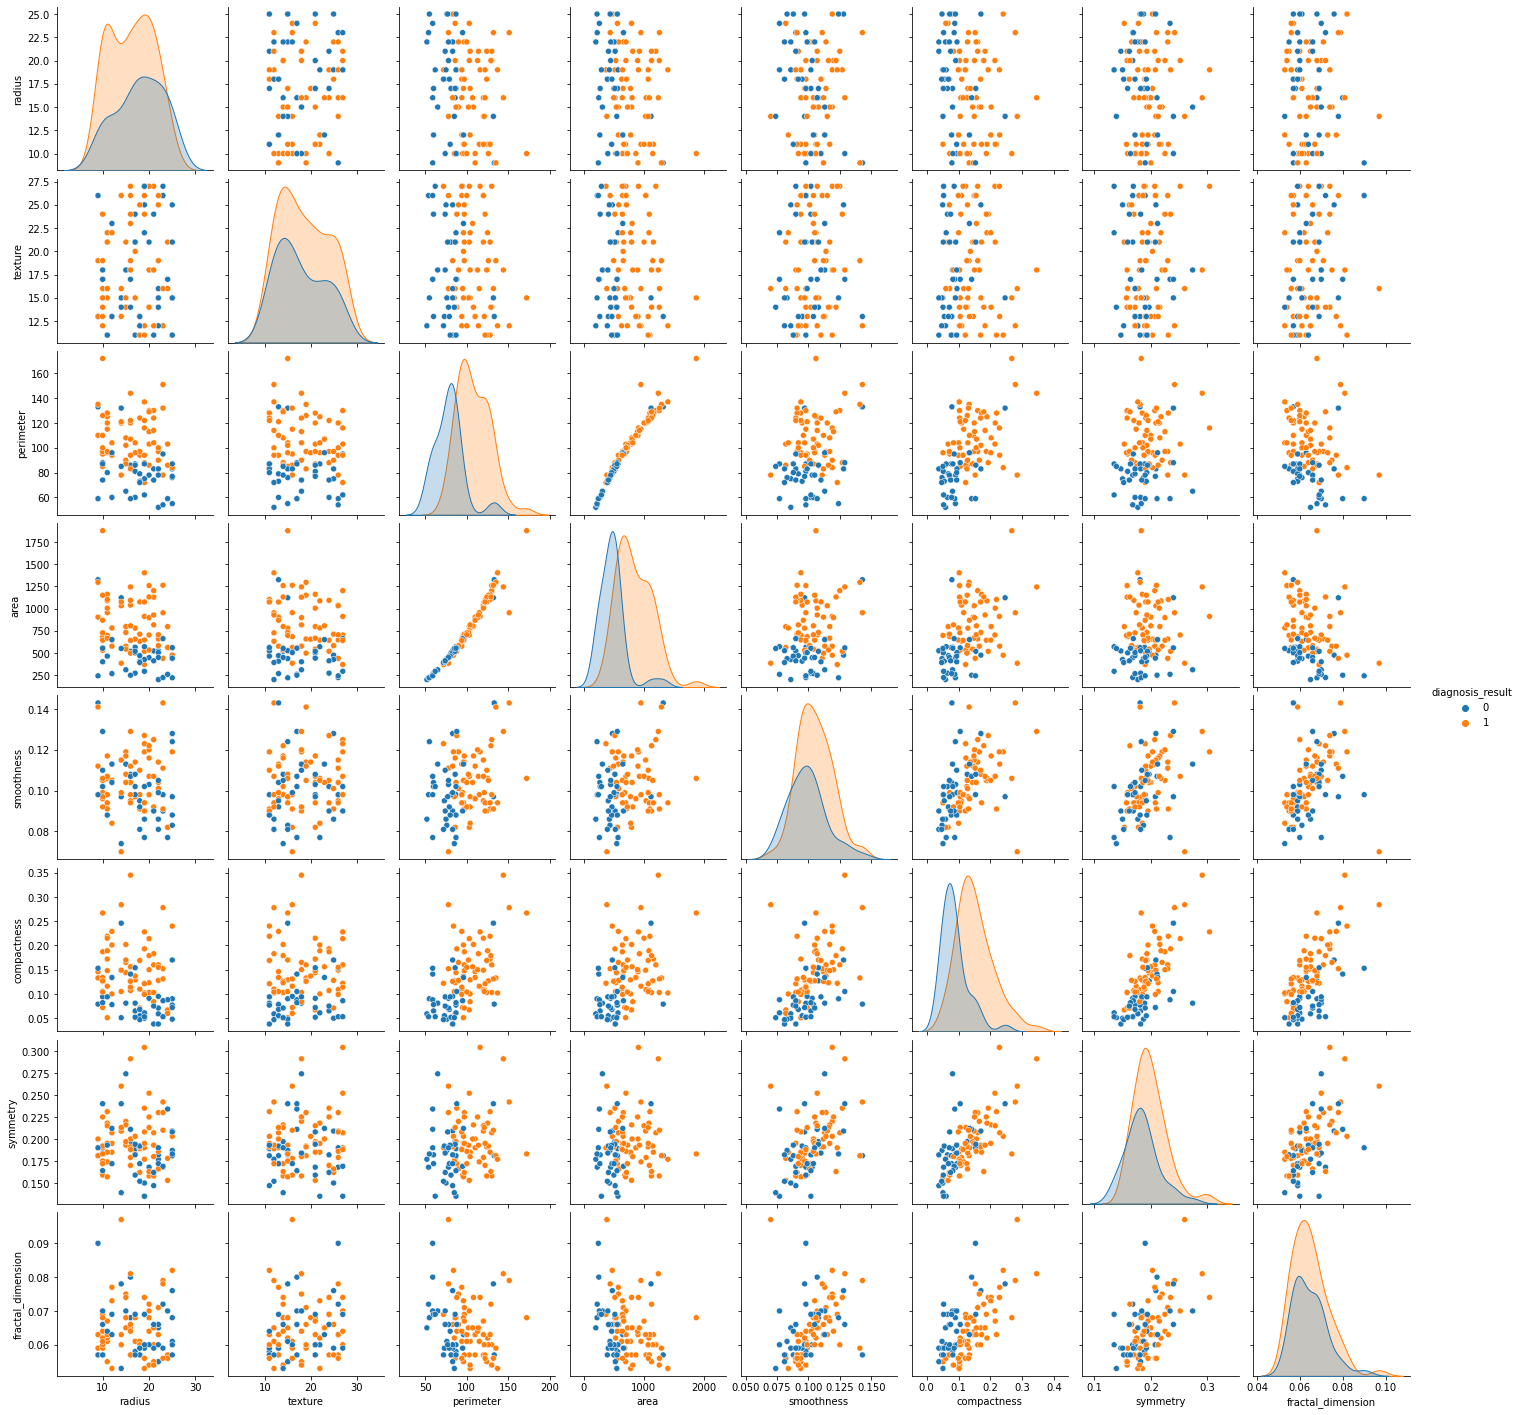

In [ ]:
sns.pairplot(df, hue="diagnosis_result")

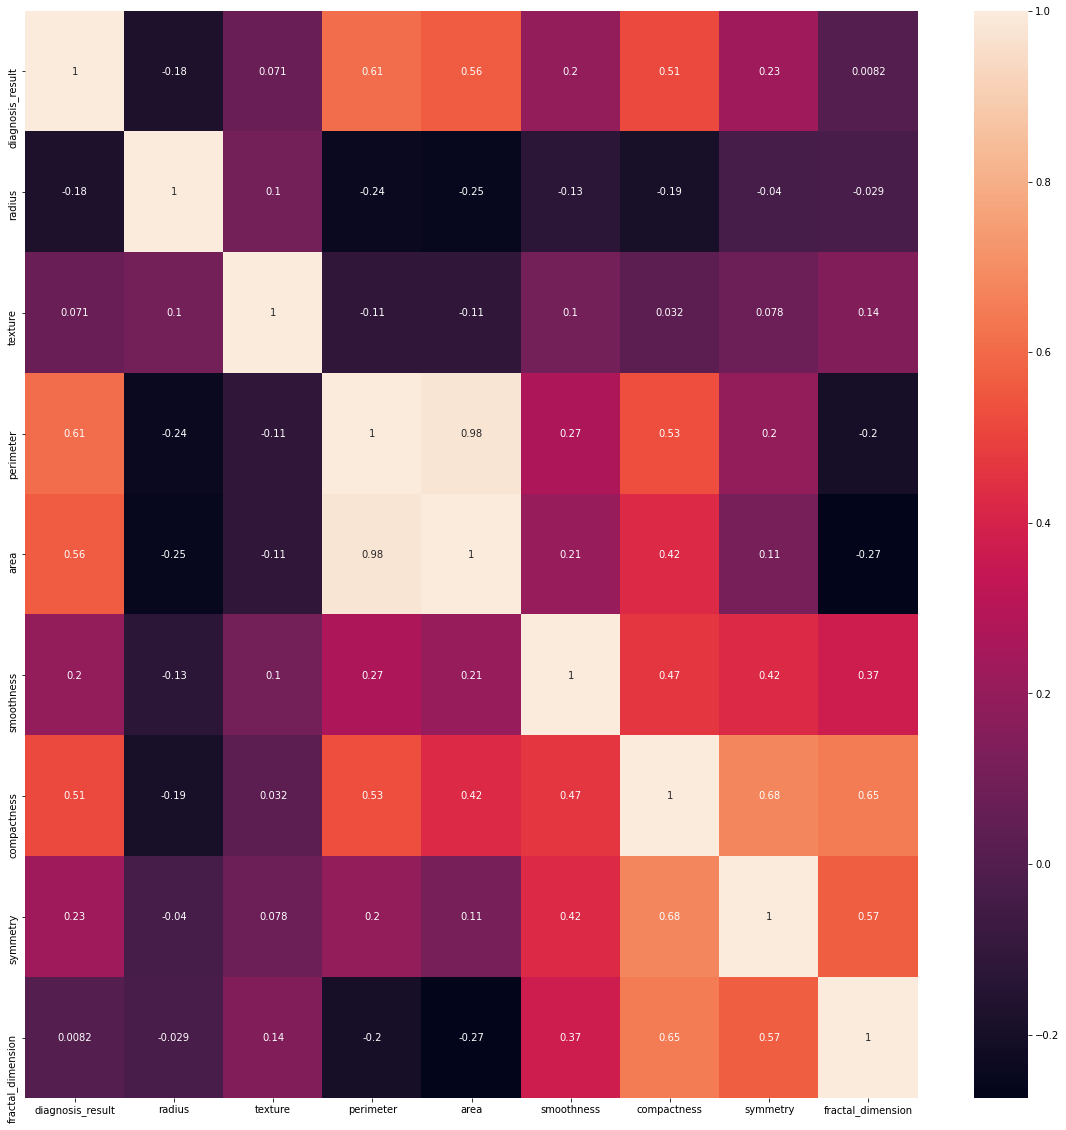

In [ ]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True)

here in heatmap shows that area and perimeter are more corelated with each other

In [ ]:
df.describe()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.620000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,0.487832,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,0.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,0.000000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,1.000000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,1.000000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,1.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


## **Model building**

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN

In [ ]:
df.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
X=df.drop('diagnosis_result',axis=1)
y=df['diagnosis_result']

In [ ]:
X.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: diagnosis_result, dtype: int64

## Train Test Split



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35)

In [ ]:
X_train.shape

(65, 8)

In [ ]:
y_test.shape

(35,)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Logistic Regression**

In [ ]:
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=log.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.82      0.90      0.86        20

    accuracy                           0.83        35
   macro avg       0.83      0.82      0.82        35
weighted avg       0.83      0.83      0.83        35



In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11  4]
 [ 2 18]]


## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.86      0.90      0.88        20

    accuracy                           0.86        35
   macro avg       0.86      0.85      0.85        35
weighted avg       0.86      0.86      0.86        35



## Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_lin = SVC(kernel = 'linear', random_state = 0)

In [ ]:
svc_lin.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred1=svc_lin.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.86      0.90      0.88        20

    accuracy                           0.86        35
   macro avg       0.86      0.85      0.85        35
weighted avg       0.86      0.86      0.86        35



## **Decision Tree Classifier**

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred2=model_dt.predict(X_test)
y_pred2

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
print(classification_report(y_test, y_pred2, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.84      0.80      0.82        20

    accuracy                           0.80        35
   macro avg       0.80      0.80      0.80        35
weighted avg       0.80      0.80      0.80        35



## **Description**

`PROCESS CHART`

1. import libraries 
2. data exploration
3. build model
4. split the data 
5. use feature scalling
6. apply algorithms

   1.logistic regression
   2.random forest classifier
   3.support vector machine
   4.decision tree classifier   

`EXPLANATION`

I used python software for this project.
this is classfication problem, by using those algorithm
it is benefiting the health system to helping in
detection of cancer patient.

`CONCLUSION`

I conclude that  Random Forest Classifier  and Support Vector Machine Algorithm gives the good precision and recall score than logistic and Decision Tree Algorithm.